In [1]:
import numpy as np
import numpy.linalg as LA
import scipy

In [2]:
def gradient(gradient_f,values):
    grad = []
    for function in gradient_f:
        gradient = function(*values)
        grad.append(gradient)
    return np.array(grad)
    

In [3]:
def descent_direction(gradient_f,values):
    grad = gradient(gradient_f,values)
    p =  -(LA.norm(grad))**2
    return p

In [4]:
def armijo_step_algorithm(f,gradient,negative_grad,values,delta):
    ro = 1
    descent = descent_direction(gradient,values)
    while f(*(values+ro*negative_grad)) <= f(*values)+ro*delta*descent:
        ro *= 2
    
    while f(*(values+ro*negative_grad)) > f(*values)+ro*delta*descent:
        ro /= 2
    return ro     

In [5]:
f = lambda x,y : 100*(y-x*x)**2 + (1-x)**2
dfx = lambda x,y: -400*x*(y-x*x) + 2*x - 2
dfy = lambda x,y: 200*(y-x*x)
# f = lambda x,y : 4*x*x+y*y
# dfx = lambda x,y: 8*x+y*0
# dfy = lambda x,y: 2*y+x*0
negative_grad = gradient(np.array([dfx,dfy]),np.array([1,2]))
# negative_grad = np.array([-400,-200])
delta = 10e-4
step_size = armijo_step_algorithm(f,np.array([dfx,dfy]),negative_grad,np.array([1,2]),delta)
print(step_size)

0.0078125


C:\anaconda\envs\optds\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in long_scalars
  """Entry point for launching an IPython kernel.


In [6]:
print(dfx(1,1))
print(dfy(1,1))

0
0


In [7]:
from numpy import linalg as LA
def general_descent(accuracy,function,gradient_f,initial):
    xk = initial
    counter = 0
    xk1 = 0
    delta = 10**(-4)
    while counter <=20:
        print(LA.norm(gradient(gradient_f,xk)))
        dk = -gradient(gradient_f,xk)
        step_size = armijo_step_algorithm(function,gradient_f,dk,xk,delta)
        xk1 = xk + step_size*dk
        xk = xk1
        print('xk1 at iterate: {}--->: {}'.format(counter,xk1))
        print('dk at iterate: {}--->: {}'.format(counter,dk))
        print('step_size at iterate: {}--->: {}'.format(counter,step_size))
        counter += 1
        if LA.norm(gradient(gradient_f,xk)) <= 0.001:
            break
    return xk1

In [8]:
general_descent(10,f,np.array([dfx,dfy]),np.array([1,2]))

447.21359549995793
xk1 at iterate: 0--->: [1.390625  1.8046875]
dk at iterate: 0--->: [ 400 -200]
step_size at iterate: 0--->: 0.0009765625
77.078045241646
xk1 at iterate: 1--->: [1.3197059  1.82991219]
dk at iterate: 1--->: [-72.62115479  25.83007812]
step_size at iterate: 1--->: 0.0009765625
49.24141575178425
xk1 at iterate: 2--->: [1.3645951  1.81266834]
dk at iterate: 2--->: [ 45.96653737 -17.65770277]
step_size at iterate: 2--->: 0.0009765625
29.433128433325837
xk1 at iterate: 3--->: [1.33752315 1.82232682]
dk at iterate: 3--->: [-27.72167391   9.89029043]
step_size at iterate: 3--->: 0.0009765625
18.42265230726011
xk1 at iterate: 4--->: [1.35429281 1.81581146]
dk at iterate: 4--->: [17.17213356 -6.67172745]
step_size at iterate: 4--->: 0.0009765625
11.23348059122725
xk1 at iterate: 5--->: [1.34910693 1.81759833]
dk at iterate: 5--->: [-10.62068977   3.65951293]
step_size at iterate: 5--->: 0.00048828125
2.1024477957781857
xk1 at iterate: 6--->: [1.34910693 1.81759833]
dk at itera

C:\anaconda\envs\optds\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in long_scalars
  """Entry point for launching an IPython kernel.


array([1.34910693, 1.81759833])

In [9]:
import matplotlib.pyplot as plt
x = np.arange(-10,10,1)
y = np.arange(-10,10,1)
fx = f(x,y)

In [10]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def draw_function(x,y,f):
    fig = plt.figure(figsize=(20, 10))
    ax = plt.gca(projection='3d')
    s=0.5
    x,y = np.meshgrid(x,y)
    z= f(x,y)
    ax.plot_surface(x, y, z)

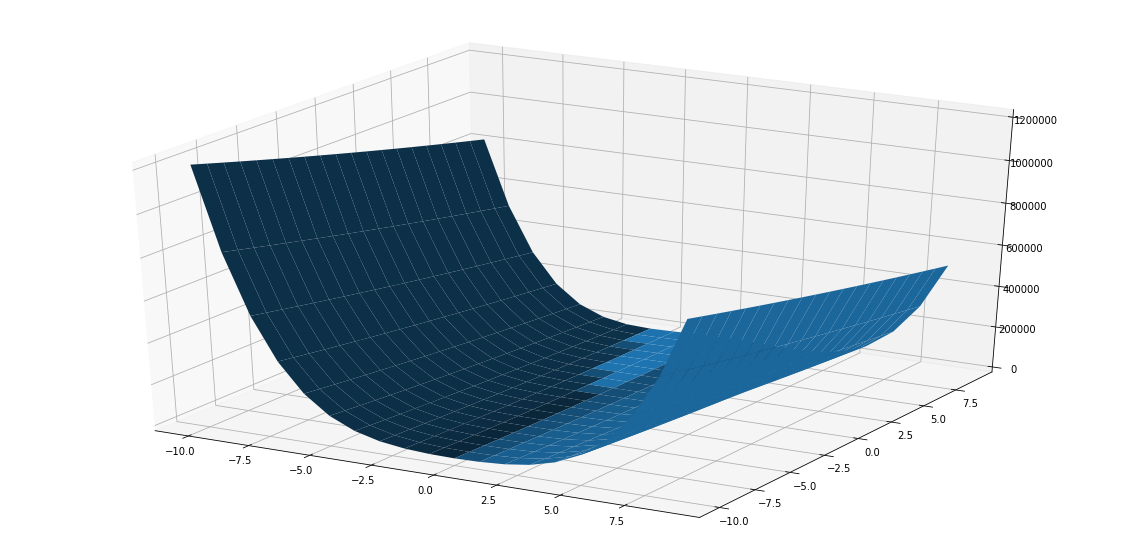

In [11]:
draw_function(x,y,f)